# Data frames with Pandas

## Programming and Data Management (EDI 3400)

### *Vegard H. Larsen (Department of Data Science and Analytics)*

# 1. What is Pandas?

## Introduction to Pandas

- A library that makes working with multidimensional structured and tabular data fast and easy
- The name is derived from *panel data* and *Python data analysis* 
- Built in support for working with time series data
- Provides Excel-like functionality to Python
- Makes data cleaning and analysis fast and convenient in Python

## Importing Pandas 

- As with NumPy there is a common import convention for Pandas

In [3]:
import pandas as pd

In [4]:
pd.__version__

'1.5.2'

# 2. Pandas data structures 

## Data structures in `Pandas`

1. Series - One dimensional array of data 
2. DataFrame - Can consist of many Series as columns in the DataFrame
3. Panel - Can consist of many DataFrames (will not be covered in this course)

## Pandas Series-object

- A one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.)

In [5]:
import pandas as pd

series1 = pd.Series([100, 200, 300, 400])

In [6]:
series1

0    100
1    200
2    300
3    400
dtype: int64

In [7]:
type(series1)

pandas.core.series.Series

## Working with the Series

In [8]:
# Getting out values

series1[0]

100

In [9]:
# Assigning values

series1[1] = 1234

In [10]:
series1

0     100
1    1234
2     300
3     400
dtype: int64

In [11]:
# Slicing

series1[1:3]

1    1234
2     300
dtype: int64

## Numerical operations 

In [12]:
# We can initialize a Series from a dictionary

s1 = pd.Series({'a': 10, 'b': 20, 'c': 30})
s2 = pd.Series({'a': 0.1, 'b': 0.2, 'c':0.3, 'd':0.4, 'e': 0.5})

In [13]:
#s2

In [14]:
s1 * 2

a    20
b    40
c    60
dtype: int64

In [15]:
s3 = s1 + s2
s3

a    10.1
b    20.2
c    30.3
d     NaN
e     NaN
dtype: float64

## Series methods

In [16]:
# Drop nans

s3.dropna()
s3

a    10.1
b    20.2
c    30.3
d     NaN
e     NaN
dtype: float64

In [17]:
# Drop particular indexes

s3.drop(['a', 'e'])

b    20.2
c    30.3
d     NaN
dtype: float64

In [18]:
# We can concatenate data

pd.concat([s1,s2])

a    10.0
b    20.0
c    30.0
a     0.1
b     0.2
c     0.3
d     0.4
e     0.5
dtype: float64

## Pandas DataFrame-object

In [19]:
import pandas as pd

content = [['a', 1, 'apple'], 
           ['b', 2, 'banana'], 
           ['c', 3, 'orange']]

dataframe1 = pd.DataFrame(content,
                          columns=['letter', 'number', 'fruit'],
                          index=['one', 'two', 'three'])

In [20]:
dataframe1

,letter,number,fruit
one,a,1,apple
two,b,2,banana
three,c,3,orange


In [21]:
type(dataframe1)

pandas.core.frame.DataFrame

## Working with the DataFrame

In [22]:
column_fruit = dataframe1['fruit']

In [23]:
column_fruit

one       apple
two      banana
three    orange
Name: fruit, dtype: object

In [24]:
type(column_fruit)

pandas.core.series.Series

In [25]:
# Use loc to access a row from the DataFrame

row_1 = dataframe1.loc['two']

In [26]:
row_1

letter         b
number         2
fruit     banana
Name: two, dtype: object

In [27]:
## Use iloc to access row by numerical index

row_0 = dataframe1.iloc[0]

In [28]:
row_0

letter        a
number        1
fruit     apple
Name: one, dtype: object

## Viewing data

In [29]:
import numpy as np

df = pd.DataFrame(np.random.randn(10, 4), columns=list("ABCD"))

In [30]:
# Look at the 3 first rows

df.head(10)

,A,B,C,D
0,-0.864785,-0.086934,0.252111,-1.924083
1,-0.206738,-0.338405,-0.801324,0.224410
2,-0.283257,-1.679461,-1.255793,0.190690
3,-0.662530,0.205759,0.091634,1.195671
4,0.231363,0.013641,-2.134512,0.246510
5,0.314545,1.462817,-1.867106,-0.723076
6,1.023095,0.128515,0.864163,-0.645086
7,-1.192136,0.695192,-1.663699,0.076633
8,0.917729,-1.281539,-2.293167,2.122245
9,-2.583161,1.509327,-0.280341,-0.364327


In [31]:
# Look at the 3 last rows

df.tail(3)

,A,B,C,D
7,-1.192136,0.695192,-1.663699,0.076633
8,0.917729,-1.281539,-2.293167,2.122245
9,-2.583161,1.509327,-0.280341,-0.364327


## Sorting data

In [32]:
# We can sort by the values in a given column

df.sort_values(by='A')

,A,B,C,D
9,-2.583161,1.509327,-0.280341,-0.364327
7,-1.192136,0.695192,-1.663699,0.076633
0,-0.864785,-0.086934,0.252111,-1.924083
3,-0.662530,0.205759,0.091634,1.195671
2,-0.283257,-1.679461,-1.255793,0.190690
1,-0.206738,-0.338405,-0.801324,0.224410
4,0.231363,0.013641,-2.134512,0.246510
5,0.314545,1.462817,-1.867106,-0.723076
8,0.917729,-1.281539,-2.293167,2.122245
6,1.023095,0.128515,0.864163,-0.645086


## Slicing and selection

In [33]:
# Selecting via [] slices the rows

df[6:8]

,A,B,C,D
6,1.023095,0.128515,0.864163,-0.645086
7,-1.192136,0.695192,-1.663699,0.076633


In [34]:
# We can also slice the columns

df.iloc[:, 1:3]

,B,C
0,-0.086934,0.252111
1,-0.338405,-0.801324
2,-1.679461,-1.255793
3,0.205759,0.091634
4,0.013641,-2.134512
5,1.462817,-1.867106
6,0.128515,0.864163
7,0.695192,-1.663699
8,-1.281539,-2.293167
9,1.509327,-0.280341


In [35]:
# We can also ask for very specific slices

df.iloc[[0, 5, 6, 8], [0, 3]]

,A,D
0,-0.864785,-1.924083
5,0.314545,-0.723076
6,1.023095,-0.645086
8,0.917729,2.122245


## In class exercises 1

1. Create a dataframe with the following data about cities

|    | City_name | Population  | Country  | Elevation  |
|--- |---            |---|---|---|
| 0  | 'Oslo'        | 699 827    | 'Norway'  | 23   |
| 1  | 'Mexico City' | 9 209 944  | 'Mexico'  | 2250 |
| 2  | 'Berlin'      | 3 613 500  | 'Germany' | 34   | 
| 3  | 'Tokyo'       | 13 482 040 | 'Japan'   | 6    |
| 4  | 'Chicago'     | 2 714 856  | 'USA'     | 179  | 
| 5  | 'Bergen'      | 259 958    | 'Norway'  |  5   |

2. Sort the dataframe by the elevation of the city (can you sort from high to low?)

3. Sort the dataframe by the City_name

4. Create a new dataframe that only has the Norwegian cities

In [36]:
# Helper code

data_list = [['Oslo', 699_827, 'Norway', 23],
             ['Mexico City', 9_209_944, 'Mexico', 22500],
             ['Berlin', 3_613_500, 'Germany', 34],
             ['Tokyo', 13_482_040, 'Japan', 6],
             ['Chicago', 2_714_856, 'USA', 179],
             ['Bergen', 259_958, 'Norway', 5]]

In [37]:
# Your code can go here



# 3. Time series data

## Pandas has great functionality for working with dates

In [38]:
# We can create an index with dates 

dates = pd.date_range(start="2022-09-01", periods=30, freq='M')

In [39]:
dates

DatetimeIndex(['2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31',
               '2025-01-31', '2025-02-28'],
              dtype='datetime64[ns]', freq='M')

In [40]:
#pd.date_range?

### freq-options (non-exclusive list)

| Within Day | Within Month | Lower frequency |
| --- | --- | --- |
| S (seconds)        | D (calendar day) | M (monthly)          |
| T (minutely)       | B (business day) | QS (quarterly start) |
| H (hourly))        | W (weekly)       | Q (quarterly end)    |
| BH (business hour) | SM (semi-month)  | A, Y - (yearly)      |

In [41]:
dates

DatetimeIndex(['2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31',
               '2025-01-31', '2025-02-28'],
              dtype='datetime64[ns]', freq='M')

In [42]:
# Create a dataframe with random numbers and use the index with dates

df = pd.DataFrame(np.random.randn(30, 4), 
                  columns=list("ABCD"),
                  index=dates)

# A new data frame that isthe cummulative sum of the random numbers
df_sum = df.cumsum()

<AxesSubplot: >

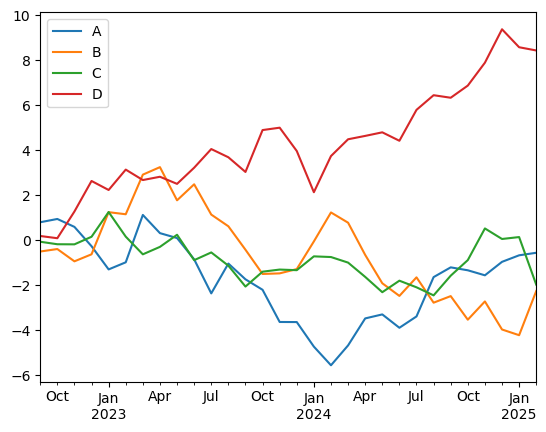

In [43]:
# Pandas has built in plotting

df_sum.plot()

# 4. Importing and exporting data

In [45]:
# Pandas has many different read methods 

data = pd.read_clipboard()

In [46]:
ls

01_Introduction.html
01_Introduction.ipynb
02_Variables_expressions_and_statements.ipynb
03_Built_in_functions_and_containers.ipynb
04a_Conditional_execution_and_loops.ipynb
04b_Opening_and_writing_to_files.ipynb
05_The_standard_Library_functions_and_classes.ipynb
06_Linear_algebra_with_Numpy.ipynb
07_Data_analysis_with_Pandas.ipynb
08_Data_vizualization_with_Matplotlib.ipynb
example.db
files/


## From Excel:

In [50]:
data_excel = pd.read_excel('files/travel_changeFromSameMonth2019.xlsx')
data_excel.head()

,Month,EU,Norge
0,2020-01-01,4.95,9.30
1,2020-02-01,6.15,13.01
2,2020-03-01,-61.04,-54.72
3,2020-04-01,-95.24,-84.19
4,2020-05-01,-89.54,-62.28


In [51]:
# We can get Pandas to read the dates for us 

data_excel = pd.read_excel('files/travel_changeFromSameMonth2019.xlsx',
                     index_col=[0],
                     parse_dates=True)
data_excel.head()

,EU,Norge
Month,,
2020-01-01,4.95,9.30
2020-02-01,6.15,13.01
2020-03-01,-61.04,-54.72
2020-04-01,-95.24,-84.19
2020-05-01,-89.54,-62.28


In [52]:
data_excel.index

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

<AxesSubplot: xlabel='Month'>

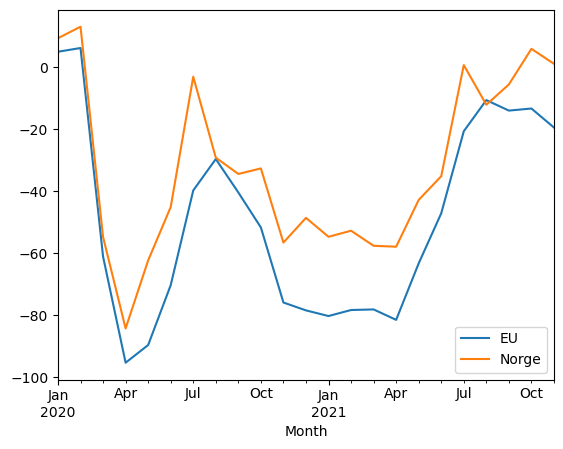

In [53]:
data_excel.plot()

## From csv (Comma Separated Values):

In [55]:
# Reading a csv-file

data_csv = pd.read_csv('files/travel_changeFromSameMonth2019.csv',
                      index_col=[0],
                      parse_dates=True)
data_csv.index

Index(['Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20',
       'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20', 'Jan-21', 'Feb-21',
       'Mar-21', 'Apr-21', 'May-21', 'Jun-21', 'Jul-21', 'Aug-21', 'Sep-21',
       'Oct-21', 'Nov-21'],
      dtype='object', name='Month')

## Save dataframe as a csv-file

In [56]:
# Let's create some random data 

df1 = pd.DataFrame(np.random.randn(30,5),
                   columns=list('ABCDE'),
                   index=pd.date_range('1990-01-01', periods=30, freq='A'))
df1.tail()

,A,B,C,D,E
2015-12-31,1.207390,-1.578415,1.679088,-1.344052,0.033868
2016-12-31,-0.737053,0.075541,-0.589998,0.366255,-0.189474
2017-12-31,-0.659783,-0.876966,-1.440923,-1.035594,0.035610
2018-12-31,0.233941,-1.638354,0.538841,0.387523,1.435102
2019-12-31,-0.217776,-0.825809,-1.094553,1.473865,-0.609431


In [57]:
# The .to_csv method saves the dataframe as a csv file

df1.to_csv('random_numbers2.csv')